In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
%pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
col=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [3]:
df=pd.read_csv('Data\data.csv')
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
cat=df.columns[df.dtypes=='object']
for i in cat:
    print(i,len(df[i].unique()))

workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42
class 2


In [22]:
df['workclass'].value_counts().reset_index().head(3)['index'].values

array([' Private', ' Self-emp-not-inc', ' Local-gov'], dtype=object)

In [10]:
def drop_columns(df,col):
        col_list=list(col)
        for i in col_list:
          df.drop(i,axis=1,inplace=True)

In [12]:
drop_columns(df,['age'])

In [15]:
df.loc['class',]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (363962665.py, line 1)

In [59]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
32556    32556
32557    32557
32558    32558
32559    32559
32560    32560
Name: Unnamed: 0, Length: 32561, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [8]:
#Numerical and categorical features
num_feature=df.columns[df.dtypes!='object']
cat_feature=df.columns[df.dtypes=='object']

In [60]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class', 'workclass_ State-gov',
       'workclass_ Self-emp-not-inc', 'workclass_ Private',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ ?',
       'workclass_ Self-emp-inc', 'workclass_ Without-pay',
       'workclass_ Never-worked', 'occupation_ Adm-clerical',
       'occupation_ Exec-managerial', 'occupation_ Handlers-cleaners',
       'occupation_ Prof-specialty', 'occupation_ Other-service',
       'occupation_ Sales', 'occupation_ Craft-repair',
       'occupation_ Transport-moving', 'occupation_ Farming-fishing',
       'occupation_ Machine-op-inspct', 'occupation_ Tech-support',
       'occupation_ ?', 'occupation_ Protective-serv',
       'occupation_ Armed-Forces', 'occupation_ Priv-house-serv', 'x'],
      dtype='object')

In [74]:
df['education'].value_counts().reset_index().head(3)['index']

0          HS-grad
1     Some-college
2        Bachelors
Name: index, dtype: object

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


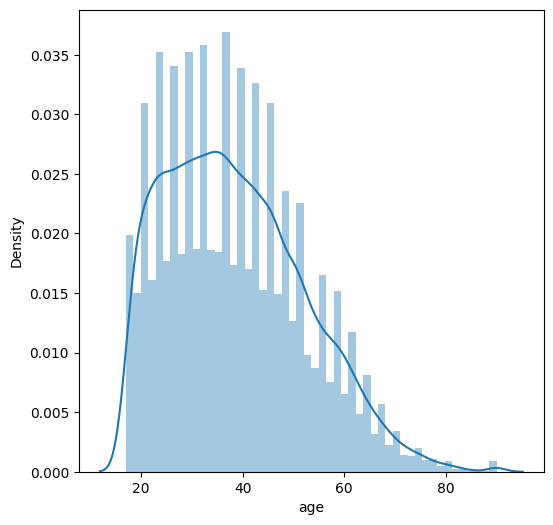

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


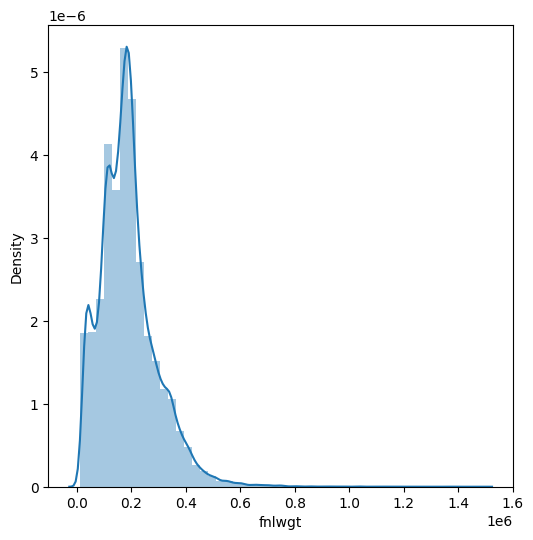

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


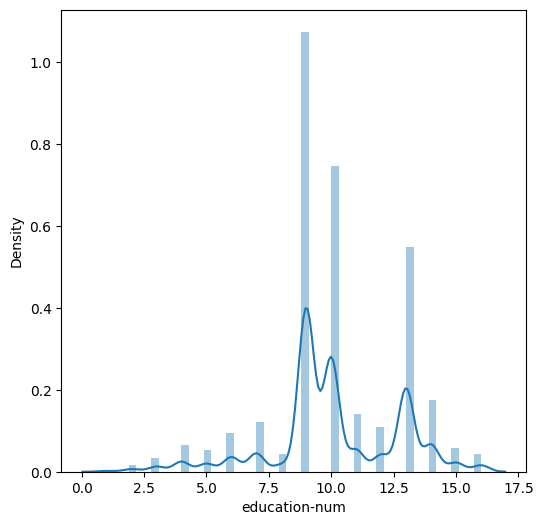

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


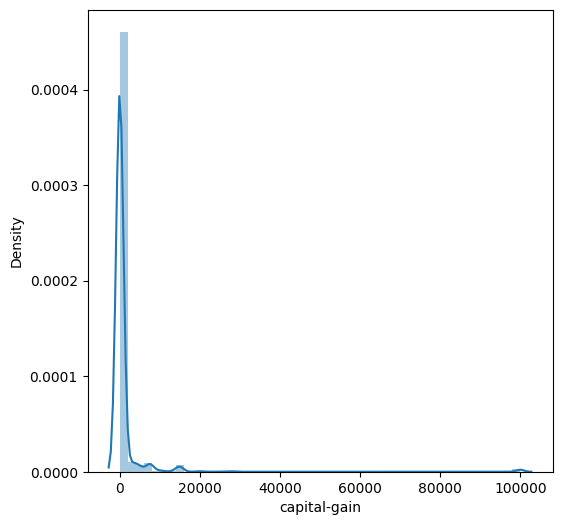

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


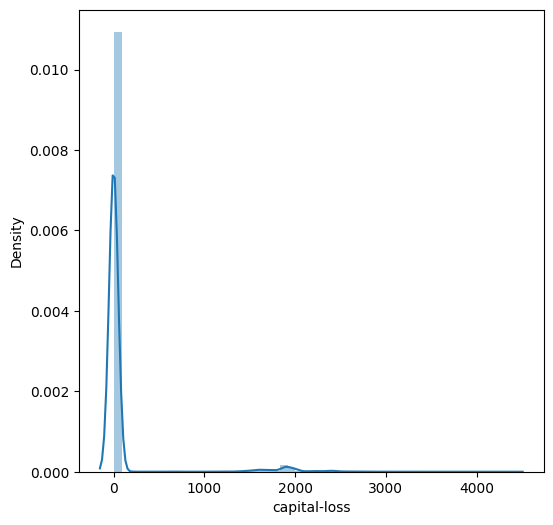

C:\Users\sk582\AppData\Local\Temp\ipykernel_1592\2930182196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


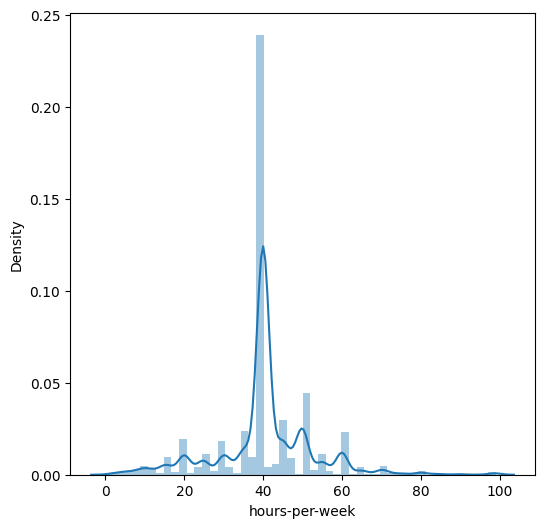

In [18]:
#Analysing numerical features
for featues in num_feature:
    data=df[featues]
    plt.figure(figsize=(6,6))
    sns.distplot(data)
    plt.xlabel(featues)
    plt.show()

Age is close to Normal distribution  

Rest are Close to log Normal distribution

In [20]:
cat_feature

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

In [21]:
for feature in cat_feature:
    print(f"The feature is {feature}, number of distinct classes are {len(df[feature].unique())}")

The feature is workclass, number of distinct classes are 9
The feature is education, number of distinct classes are 16
The feature is marital-status, number of distinct classes are 7
The feature is occupation, number of distinct classes are 15
The feature is relationship, number of distinct classes are 6
The feature is race, number of distinct classes are 5
The feature is sex, number of distinct classes are 2
The feature is native-country, number of distinct classes are 42
The feature is class, number of distinct classes are 2


In [33]:
(df['occupation'].value_counts()/len(df['occupation']))

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64

In [52]:
freq_col=['workclass','occupation']

# for i in freq_col:
top5= df['workclass'].value_counts()[:3].index
print(top5)
for j in top5:
         df['workclass_'+j]=(np.where(df['workclass']==j,1,0))
         

Index([' Private', ' Self-emp-not-inc', ' Local-gov'], dtype='object')


In [57]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
for feature in cat_feature:
    print("=======================")
    print(f'''
    ------------
    | {feature} |
    -------------
    ''')
    print(df[feature].unique()[:10])
    print("=======================")


    ------------
    | workclass |
    -------------
    
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

    ------------
    | education |
    -------------
    
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate']

    ------------
    | marital-status |
    -------------
    
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

    ------------
    | occupation |
    -------------
    
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct']

    ------------
    | relationship |
    -------------
    
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

    ------------
    | race |
    -------------
    
[' White

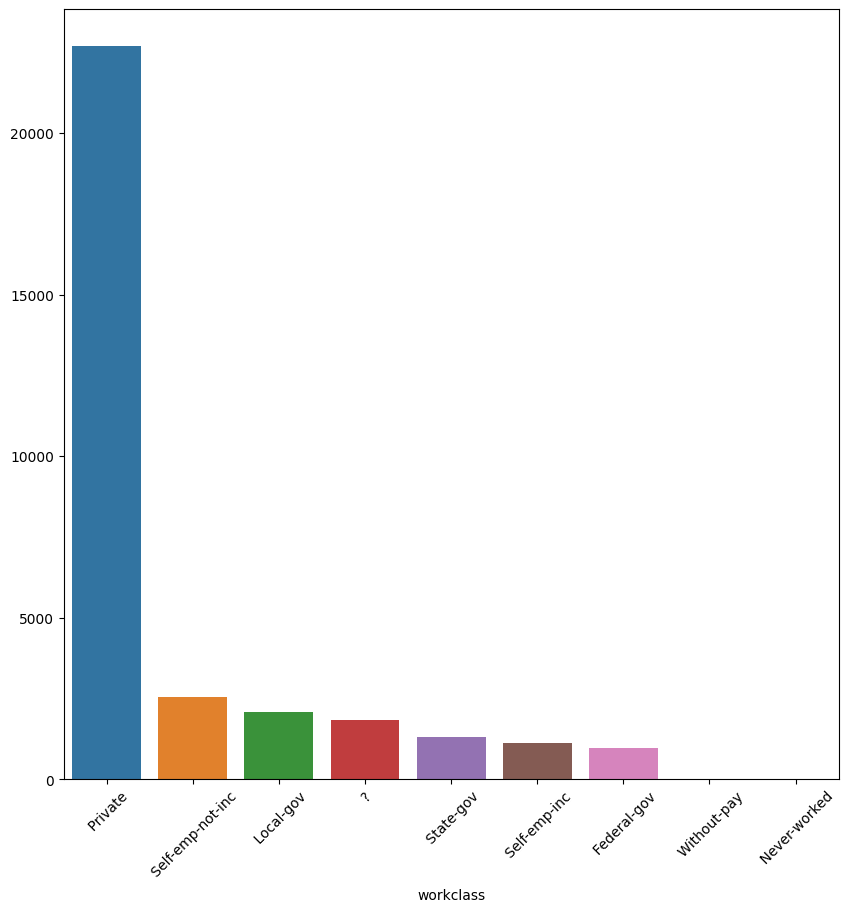

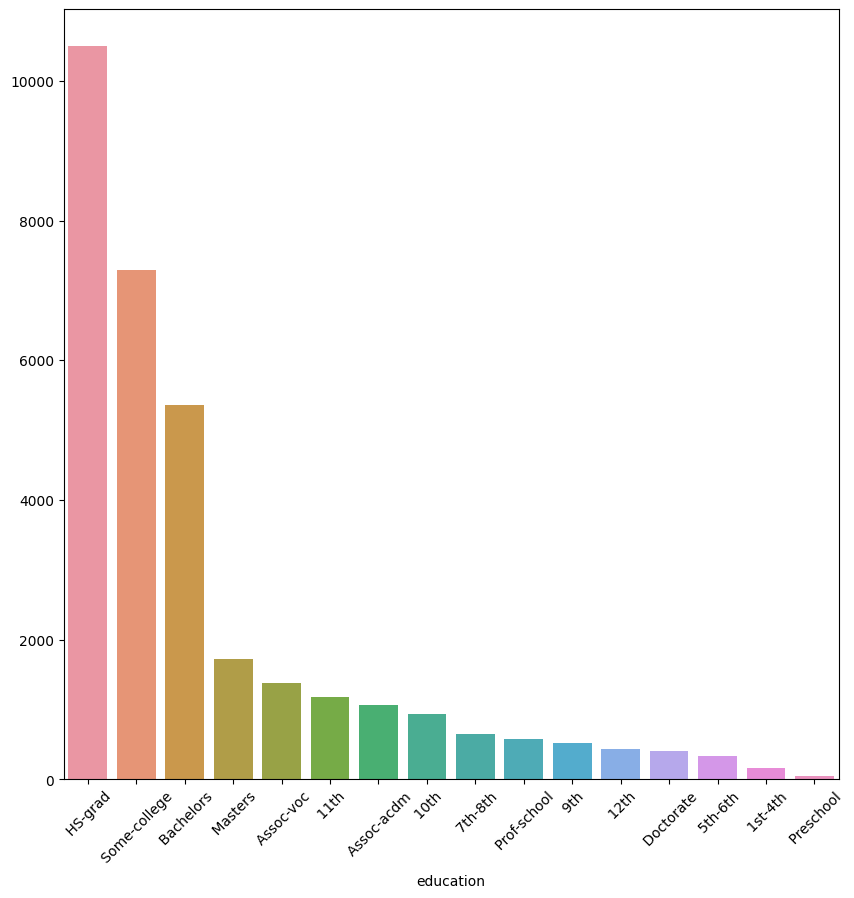

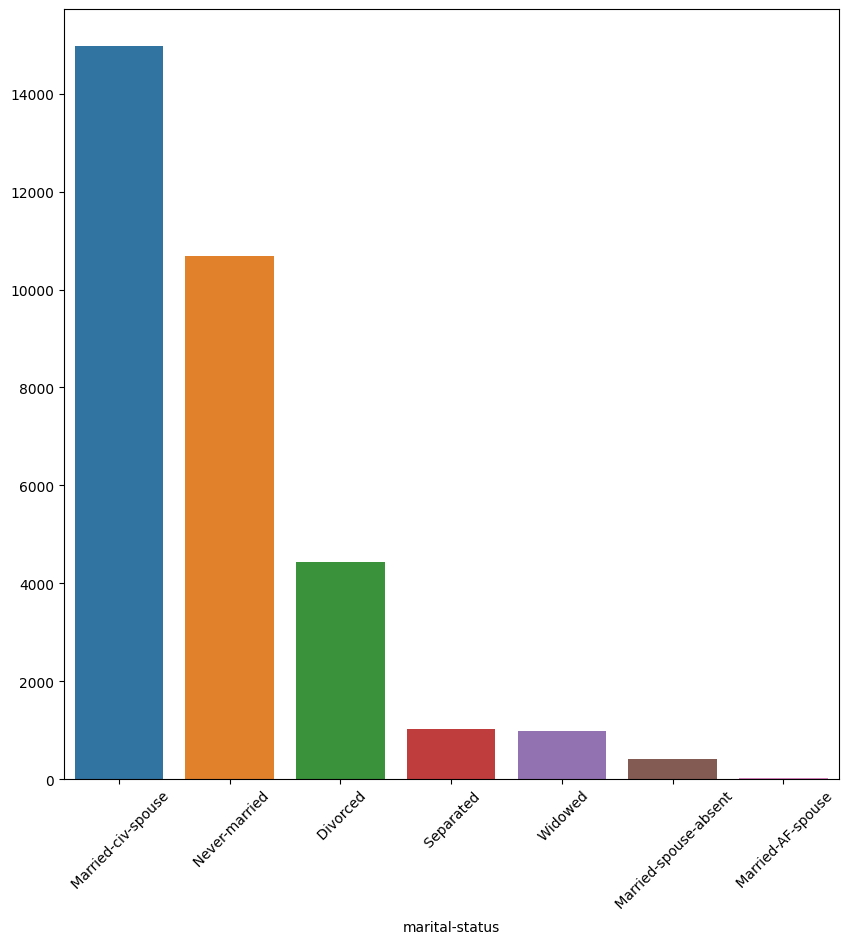

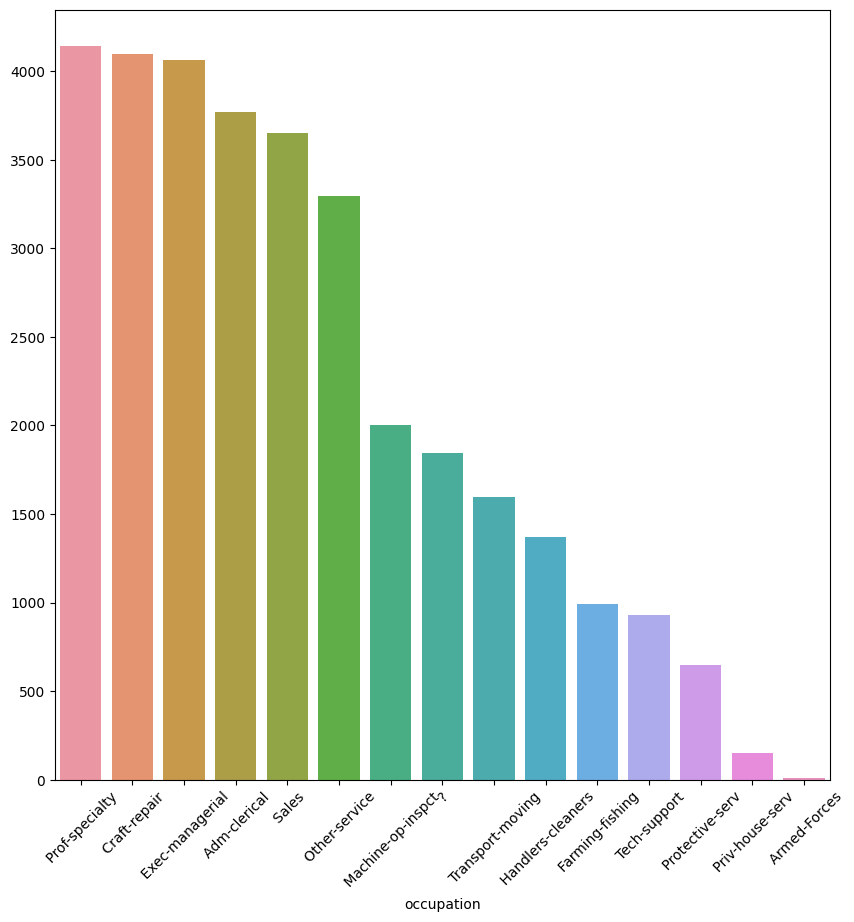

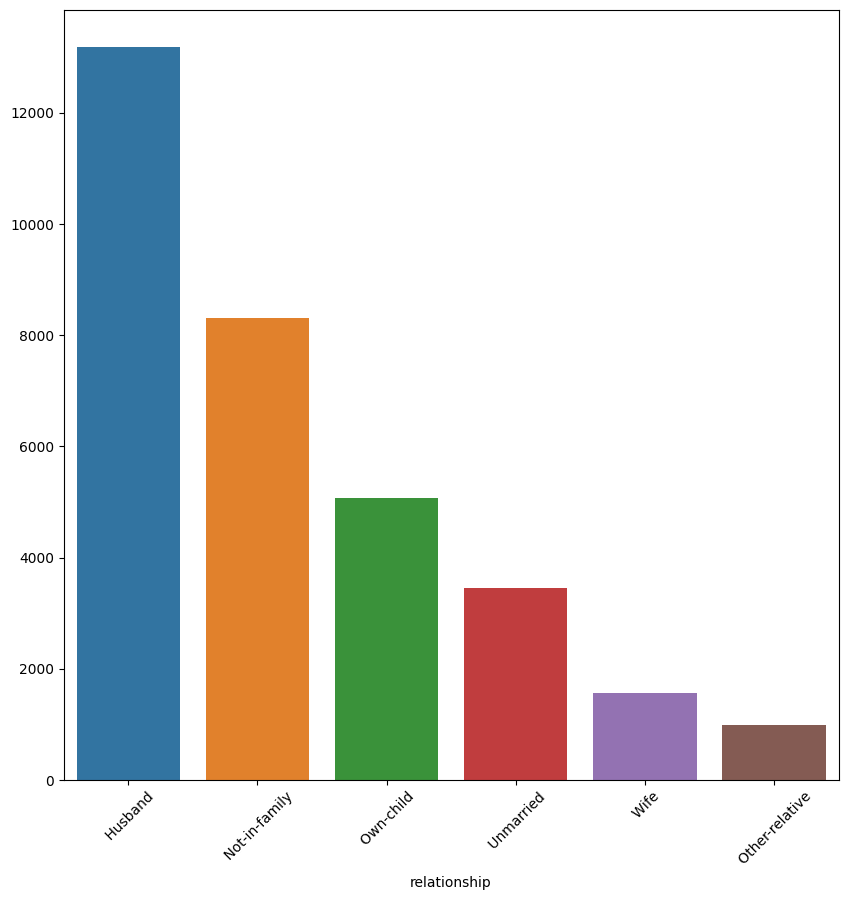

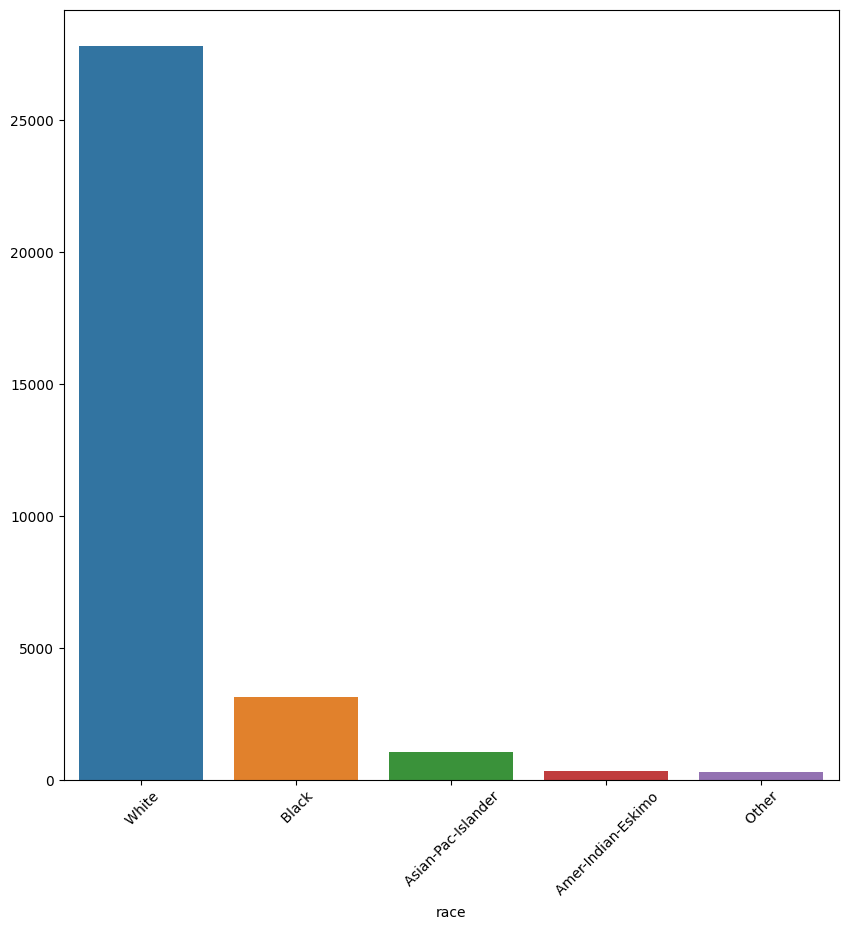

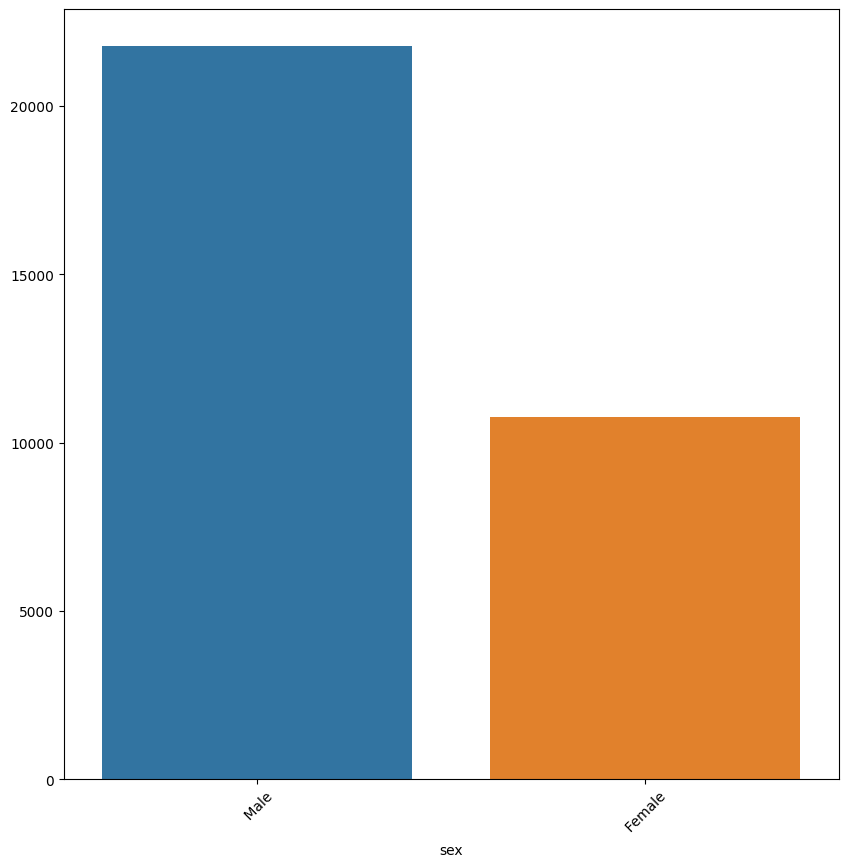

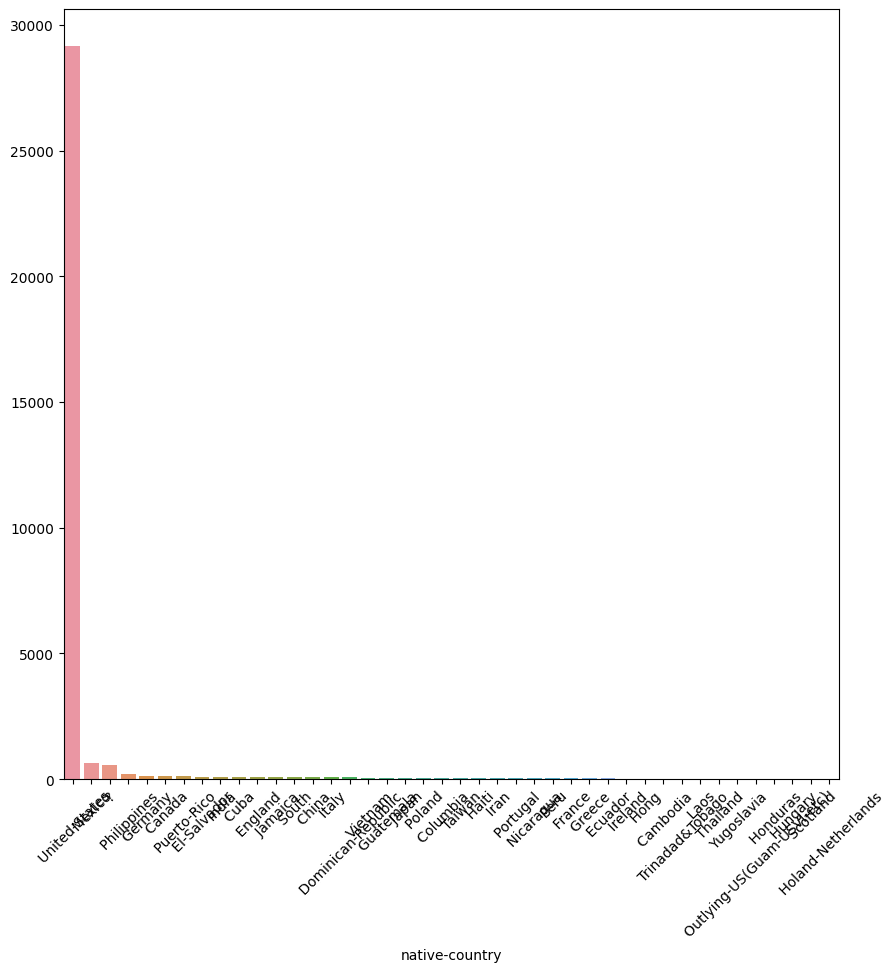

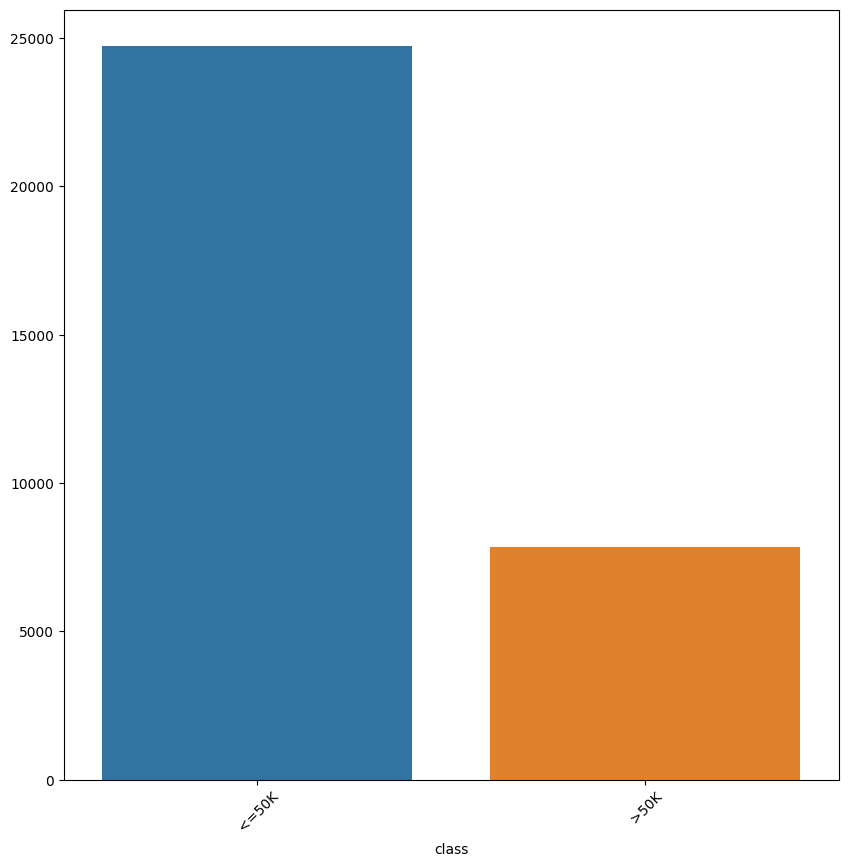

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)


In [36]:
for i in cat_feature:
    key = df[i].value_counts().index
    value = df[i].value_counts().values
    plt.figure(figsize=(10,10))
    sns.barplot(x=key,y=value)
    plt.xticks(rotation=45)
    plt.xlabel(i)
    plt.show()

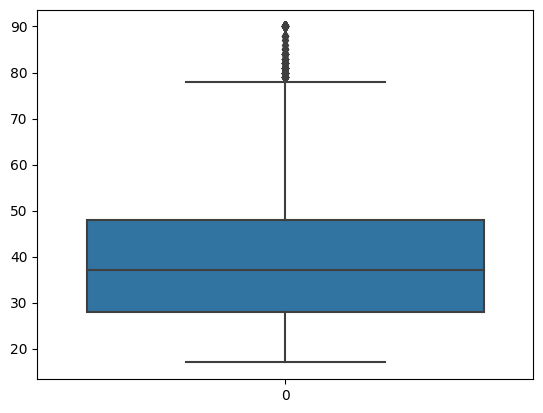

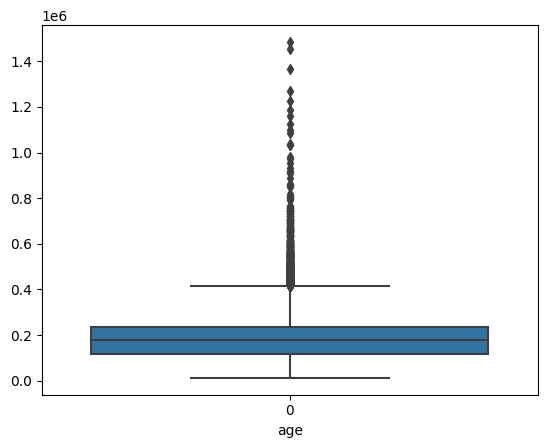

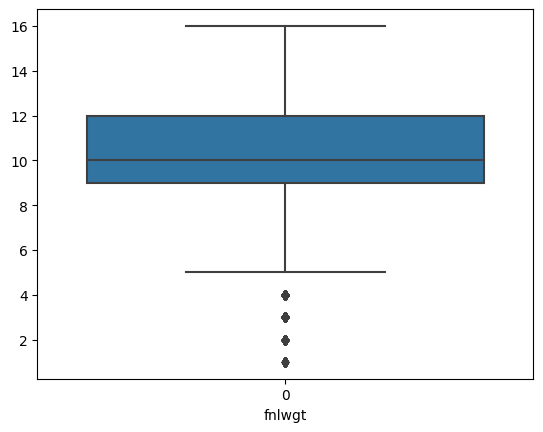

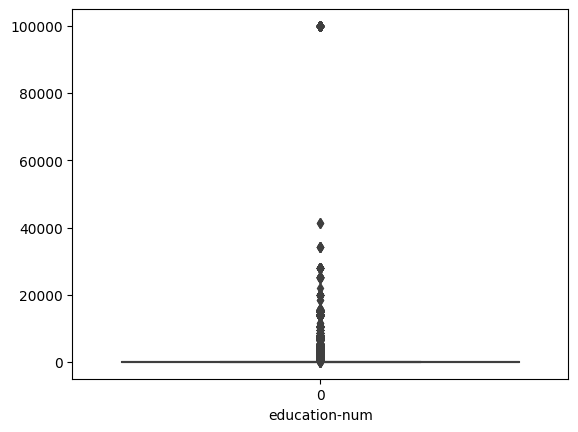

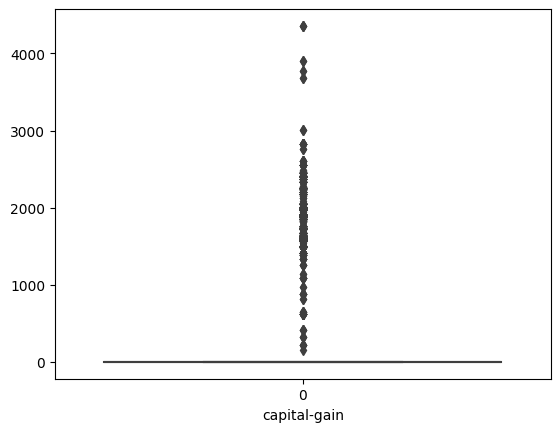

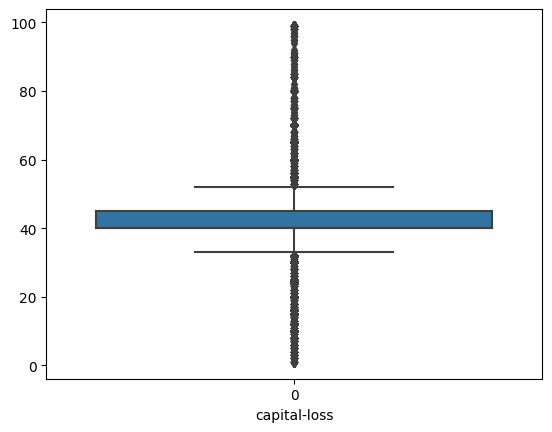

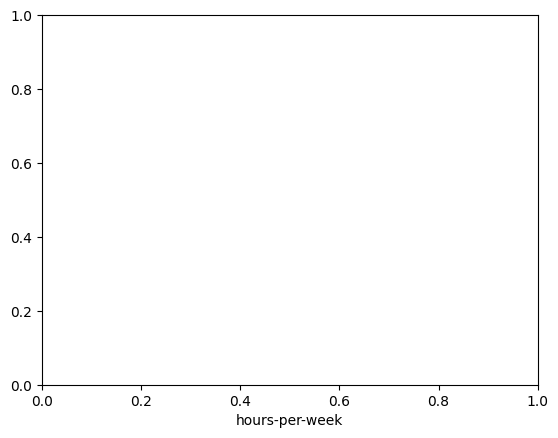

In [39]:
for i in num_feature:
    sns.boxplot(df[i])
    plt.show()
    plt.xlabel(i)

<Axes: >

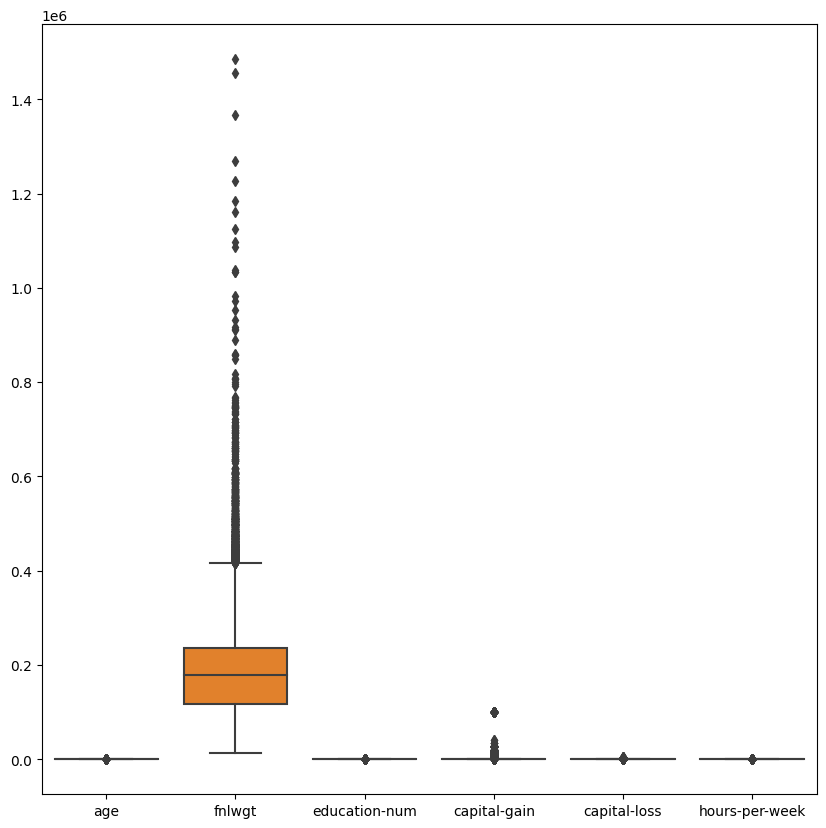

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(df[num_feature])

OSError: Cannot save file into a non-existent directory: '\modelData'

In [ ]:
pd.to